# Mall Customer Sementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset and some information about dataset

In [ ]:
dataset = pd.read_csv('/content/Datase_Clustering.csv', encoding = 'unicode_escape')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Data Overviewing and Cleaning

In [ ]:
dataset.info()
# Count Countries
dataset['Country'].value_counts()
# drop column
# dataset.drop('StockCode',axis=1,inplace=True)
# Replace null value with sum
dataset.isnull().sum()
# drop None values
dataset.dropna(inplace = True)
dataset.loc[dataset['CustomerID'].isnull()==True]
# Drop Negative values
dataset.drop(dataset[dataset['Quantity'] < 0].index, inplace = True)
dataset.drop(dataset[dataset['UnitPrice'] < 0].index, inplace = True)
# check
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(397924, 8)

# RFM ANALYSIS (Recency, Frequency and Monitory Analysis)
### Analysis of customers based on Following factors
### 1. Total amount a customer spent: Amount = Quality* UnitPrice
### 2. Number of transaction: Number of invoiceNo by Customer
### 3. Last Transaction: the day since last transaction
### 4. Country: country where customer made the transaction



In [ ]:
### 1. Total amount a customer spent: Amount = Quality* UnitPrice
dataset['amount'] = dataset['Quantity']* dataset['UnitPrice']
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
tm = dataset.groupby('CustomerID')['amount'].sum().reset_index()
tm

,CustomerID,amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [ ]:
### 2. Number of transaction: Number of invoiceNo by Customer
num_trans = dataset.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [ ]:
## Last Transection
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['Last_transection'] = (dataset['InvoiceDate'].max()-dataset['InvoiceDate']).dt.days
Last_Trans = dataset.groupby(['CustomerID','Country'])['Last_transection'].max().reset_index()
Last_Trans


,CustomerID,Country,Last_transection
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


# RFM Dataset Creation by merging

In [ ]:
merge1 = pd.merge(Last_Trans,num_trans, how = 'inner', on = 'CustomerID')
new_df = pd.merge(merge1,tm, how = 'inner', on = 'CustomerID')
new_df

,CustomerID,Country,Last_transection,InvoiceNo,amount
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


# EDA

## 1.Remove Outlier:
### There are several method to remove outlier such as IQR method, Z-score Method, Standard Deviation Method.In this kernel, I use IQR method to remove outliers.First, I will plot the boxplot to show the distribution of new data


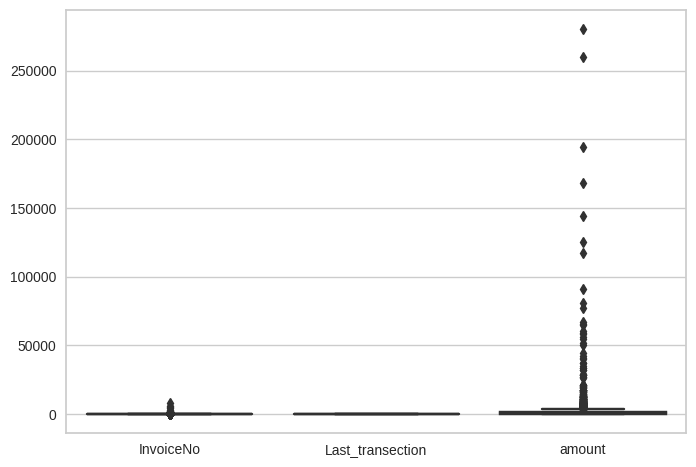

In [ ]:
plt.plot(figsize = (15,7))
sns.boxplot(data = new_df[['InvoiceNo', 'Last_transection', 'amount']])
plt.show()

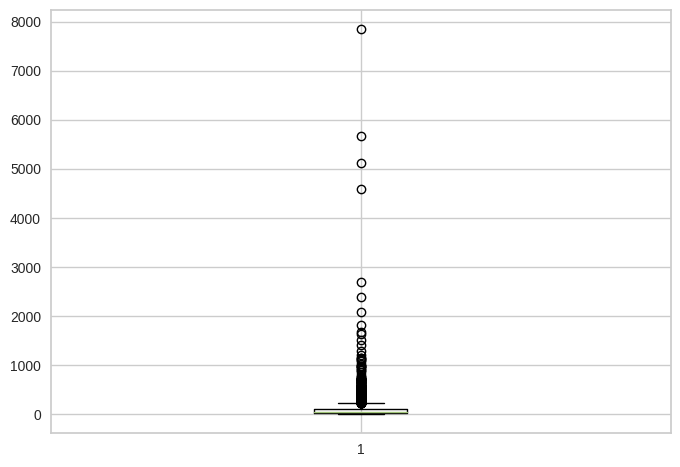

In [ ]:
# Removing Outliers using IQR Technique
plt.boxplot(new_df.InvoiceNo)
Q1 = new_df.InvoiceNo.quantile(0.25)
Q3 = new_df.InvoiceNo.quantile(0.75)
IQR = Q3-Q1
new_df = new_df[(new_df.InvoiceNo >= Q1 - 1.5*IQR) & (new_df.InvoiceNo <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a7ec2e8b4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a7ec2e8ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a7ec2e8b220>],
 'medians': [<matplotlib.lines.Line2D at 0x7a7ec2e8beb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a7ec2eb0190>],
 'means': []}

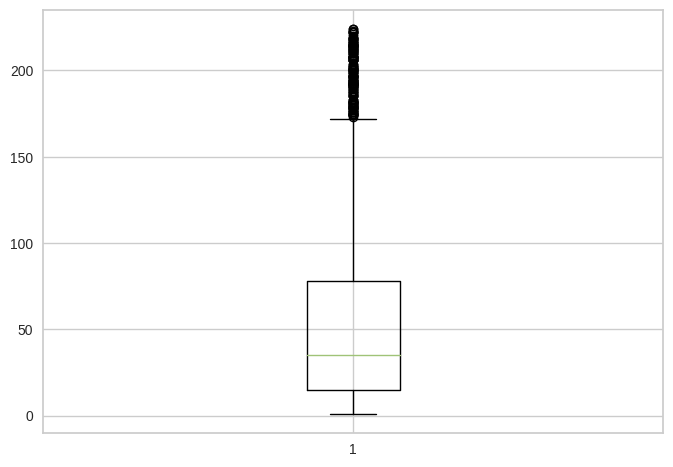

In [ ]:
plt.boxplot(new_df.InvoiceNo)

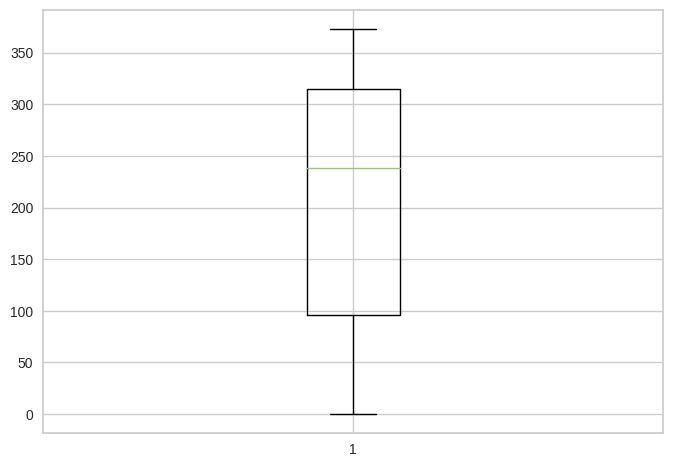

In [ ]:
#Removing Outliers from Last_transaction No using the IQR Technique
plt.boxplot(new_df.Last_transection)
Q1 = new_df.InvoiceNo.quantile(0.25)
Q3 = new_df.InvoiceNo.quantile(0.75)
IQR = Q3-Q1
new_df = new_df[(new_df.Last_transection >= Q1 - 1.5*IQR) & (new_df.Last_transection <= Q3 + 1.5*IQR)]


{'whiskers': [<matplotlib.lines.Line2D at 0x7a7ec2cef400>,
 'caps': [<matplotlib.lines.Line2D at 0x7a7ec2cef940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a7ec2cef160>],
 'medians': [<matplotlib.lines.Line2D at 0x7a7ec2cefdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a7ec2d1c0d0>],
 'means': []}

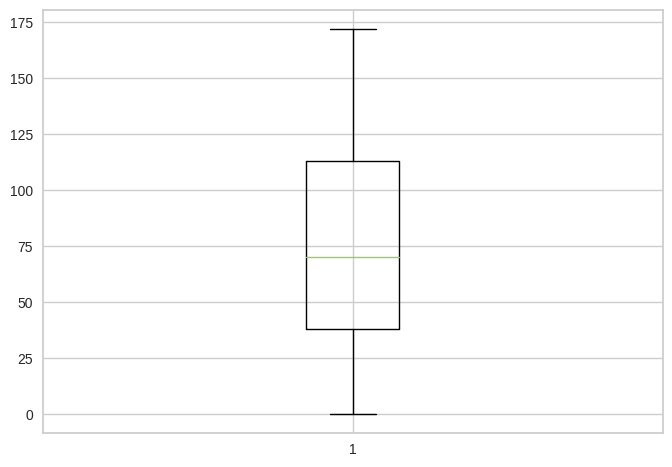

In [ ]:
plt.boxplot(new_df.Last_transection)

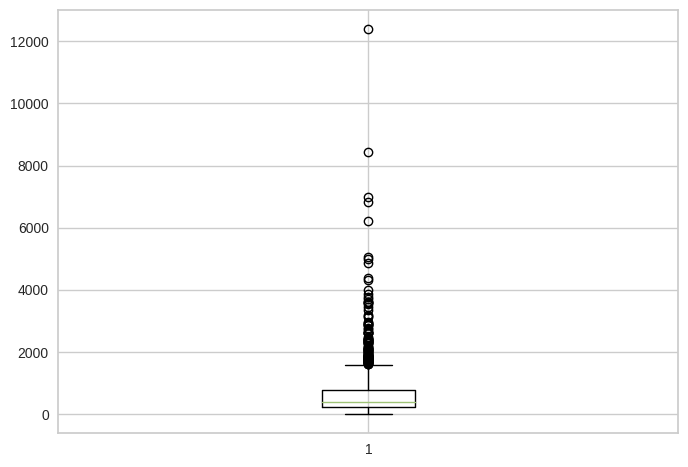

In [ ]:
#Removing Outliers from Last_transaction No using the IQR Technique
plt.boxplot(new_df.amount)
Q1 = new_df.InvoiceNo.quantile(0.25)
Q3 = new_df.InvoiceNo.quantile(0.75)
IQR = Q3-Q1
new_df = new_df[(new_df.amount >= Q1 - 1.5*IQR) & (new_df.amount <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a7ec2d78dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a7ec2d79300>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a7ec2d78b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7a7ec2d79840>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a7ec2d79ae0>],
 'means': []}

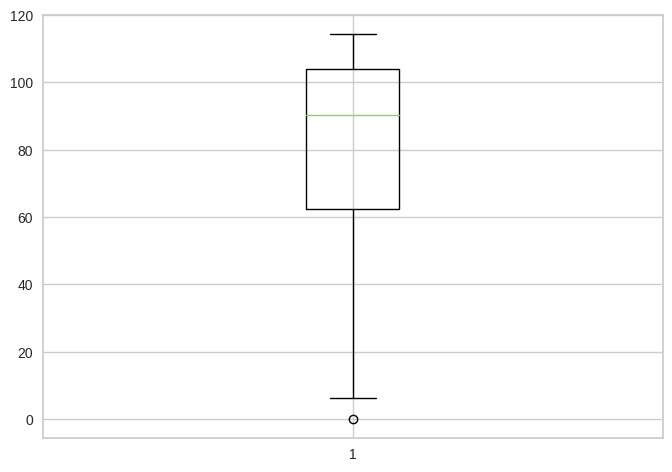

In [ ]:
plt.boxplot(new_df.amount)

#Histogram Plot:

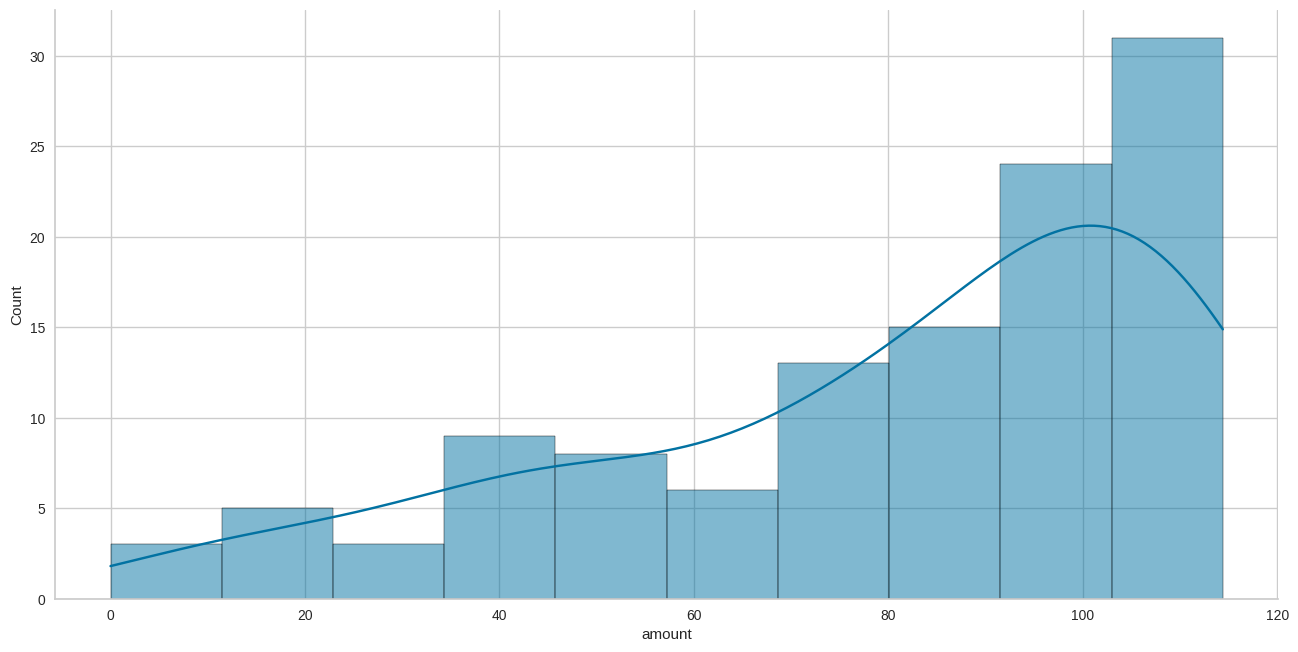

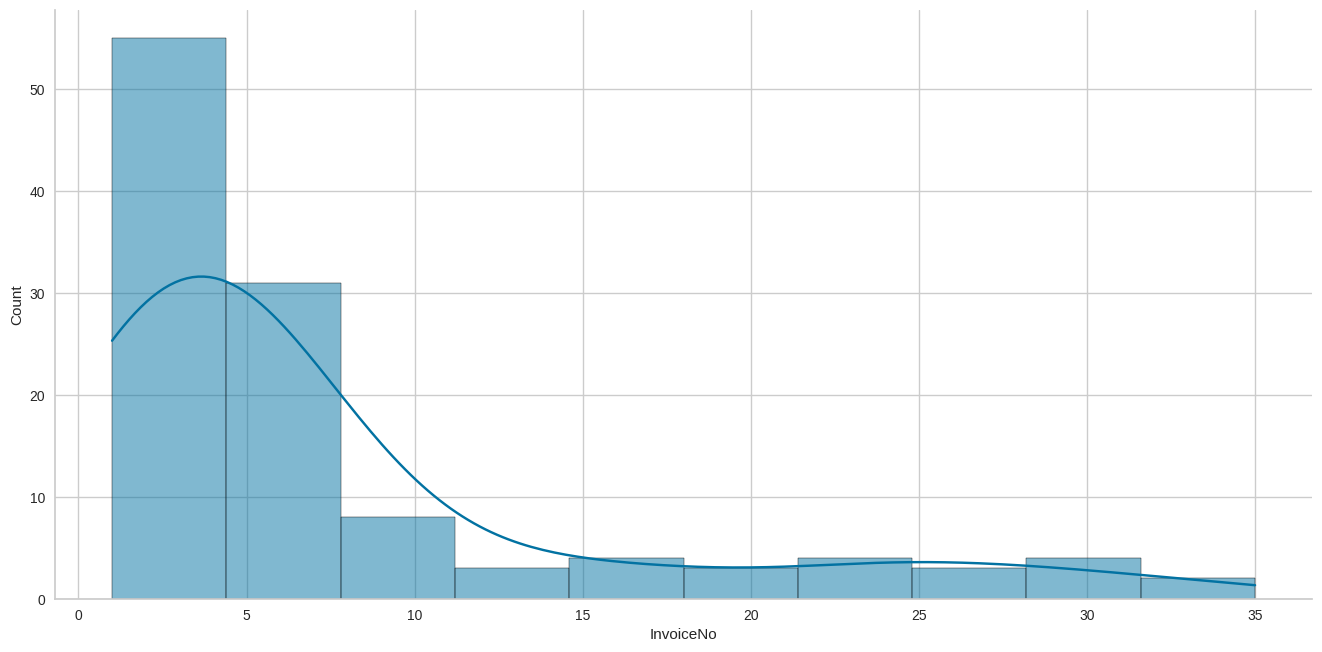

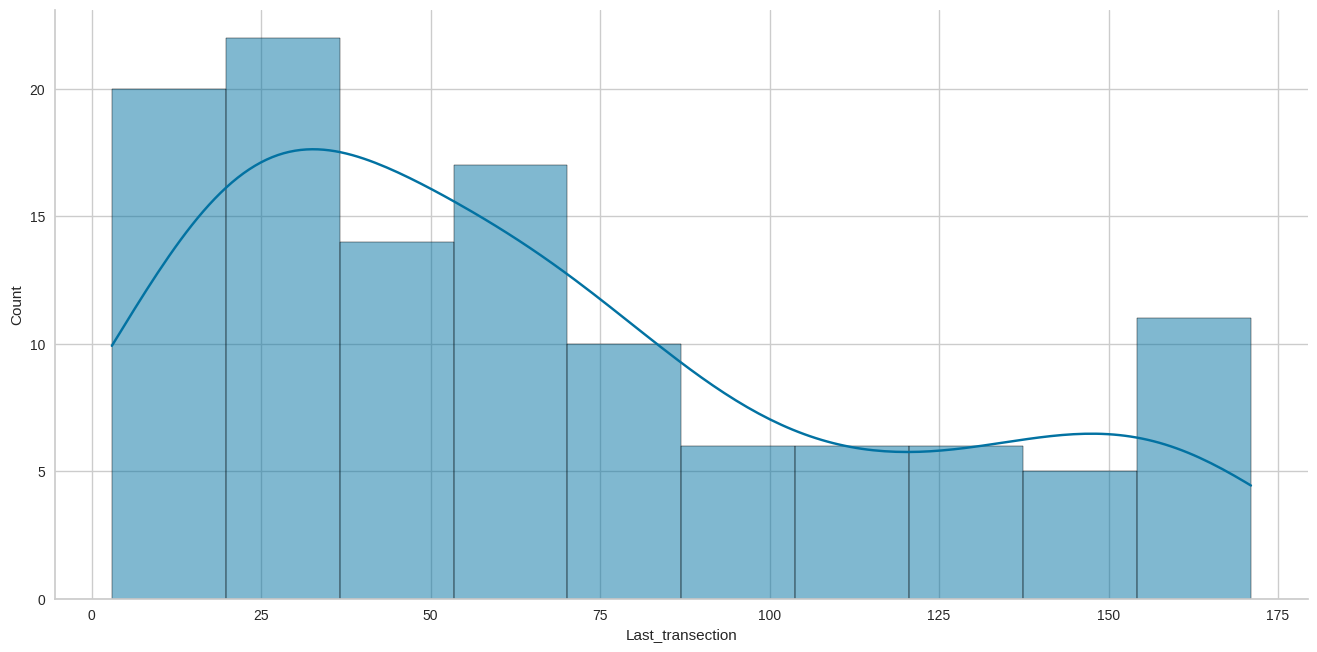

In [ ]:
#Histogram Plot:
new1_df = new_df.copy( deep = True)
df_num=['amount','InvoiceNo','Last_transection']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

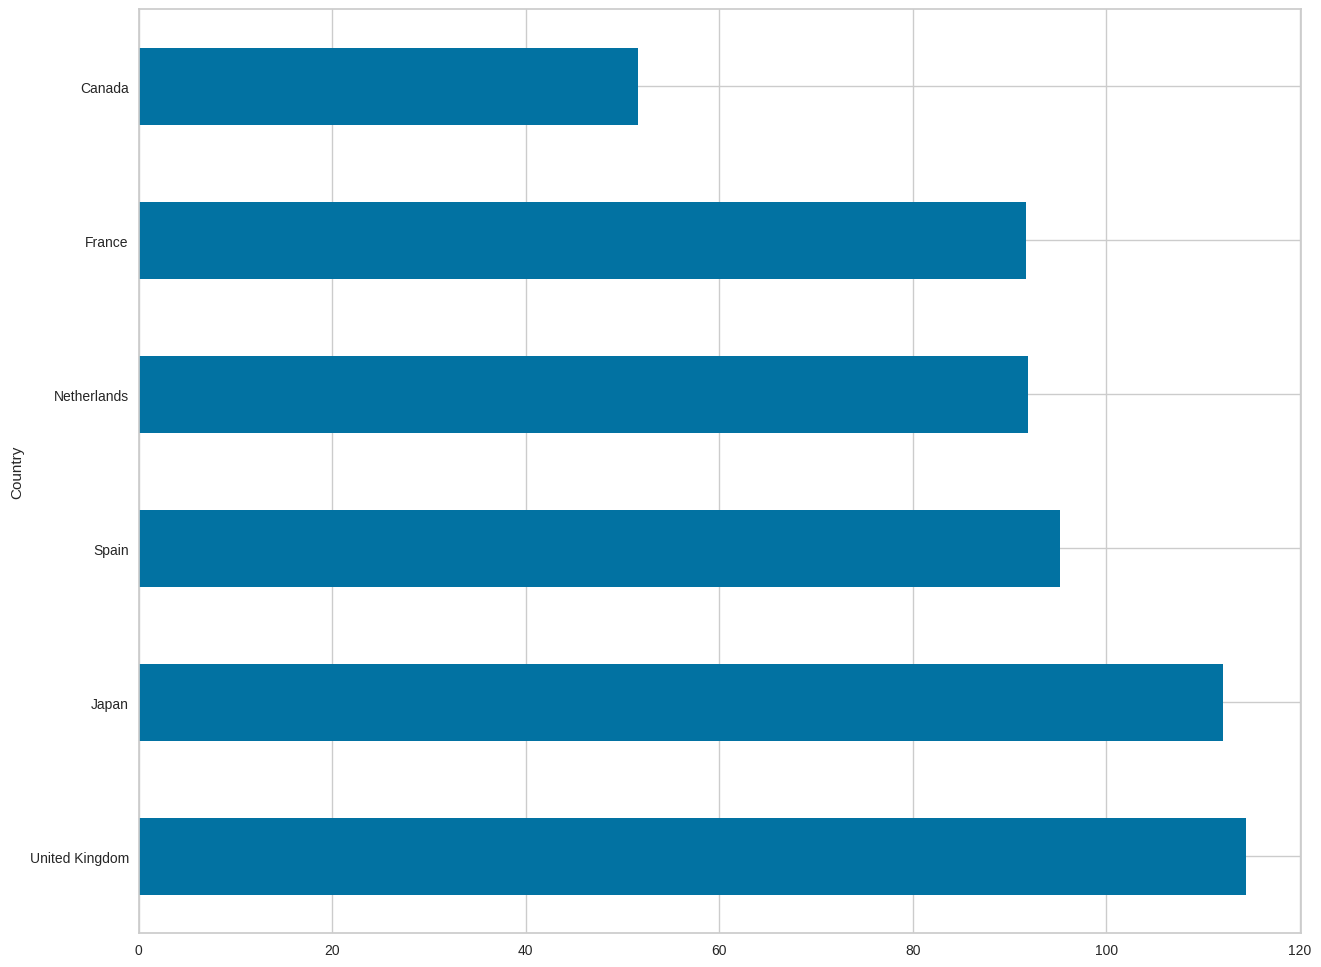

In [ ]:
# Group the Maximum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.max().sort_values(ascending=False).plot.barh()
plt.show()

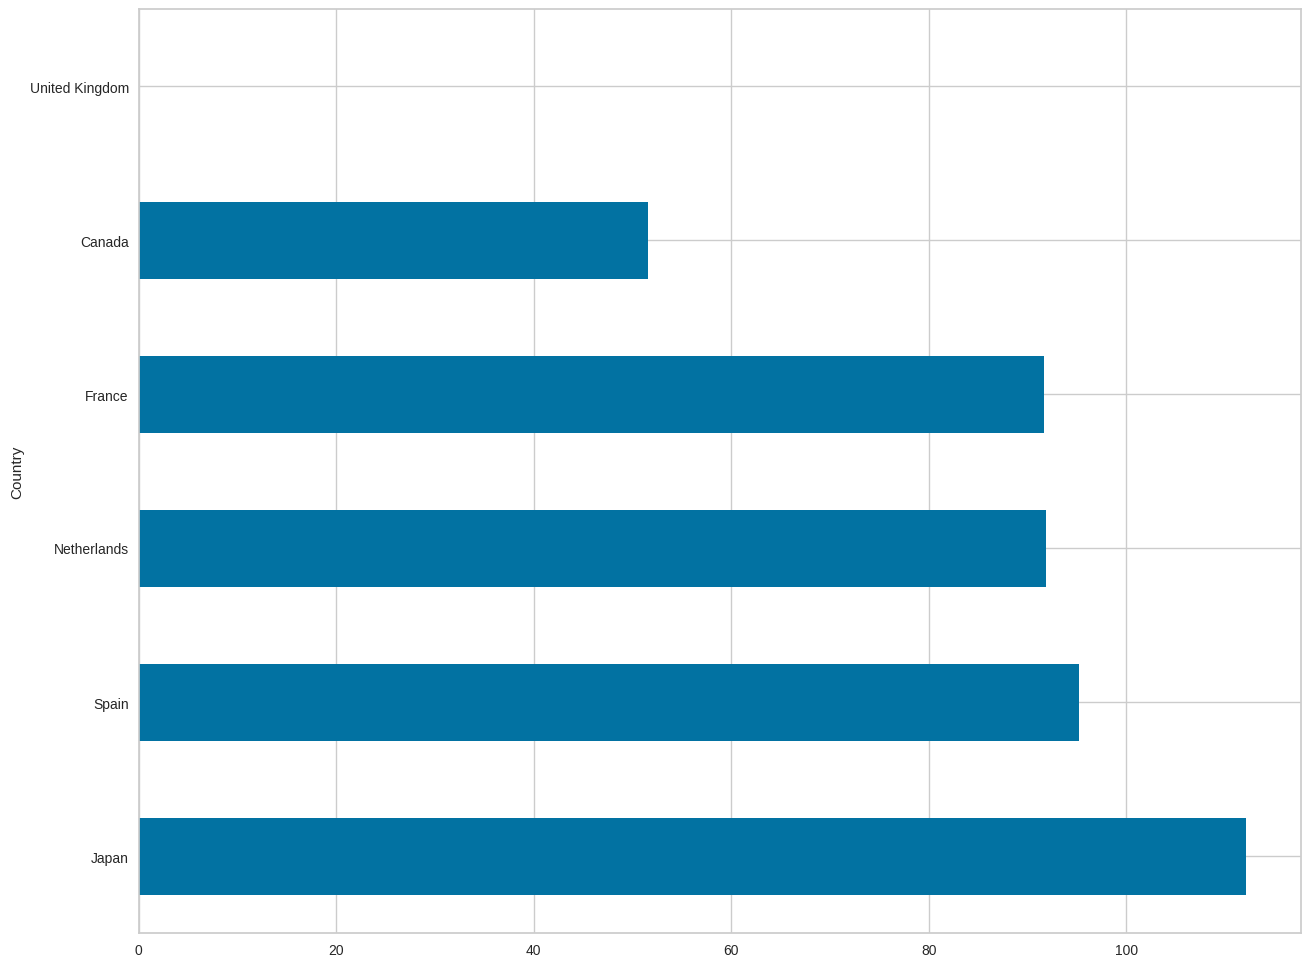

In [ ]:
# Group the Minimum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.min().sort_values(ascending=False).plot.barh()
plt.show()

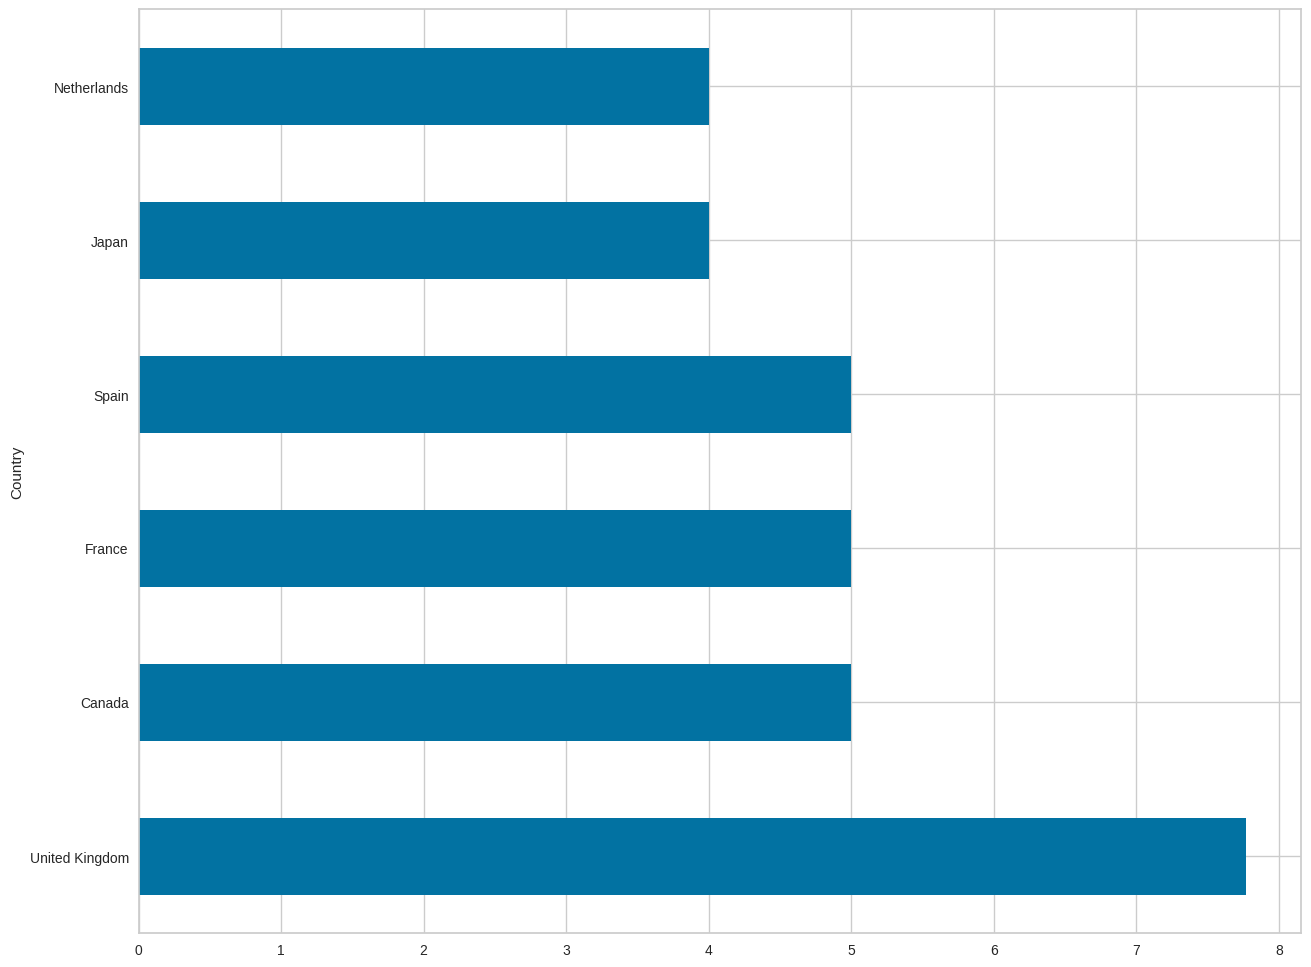

In [ ]:
# Group by the Frequency by Country
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.show()

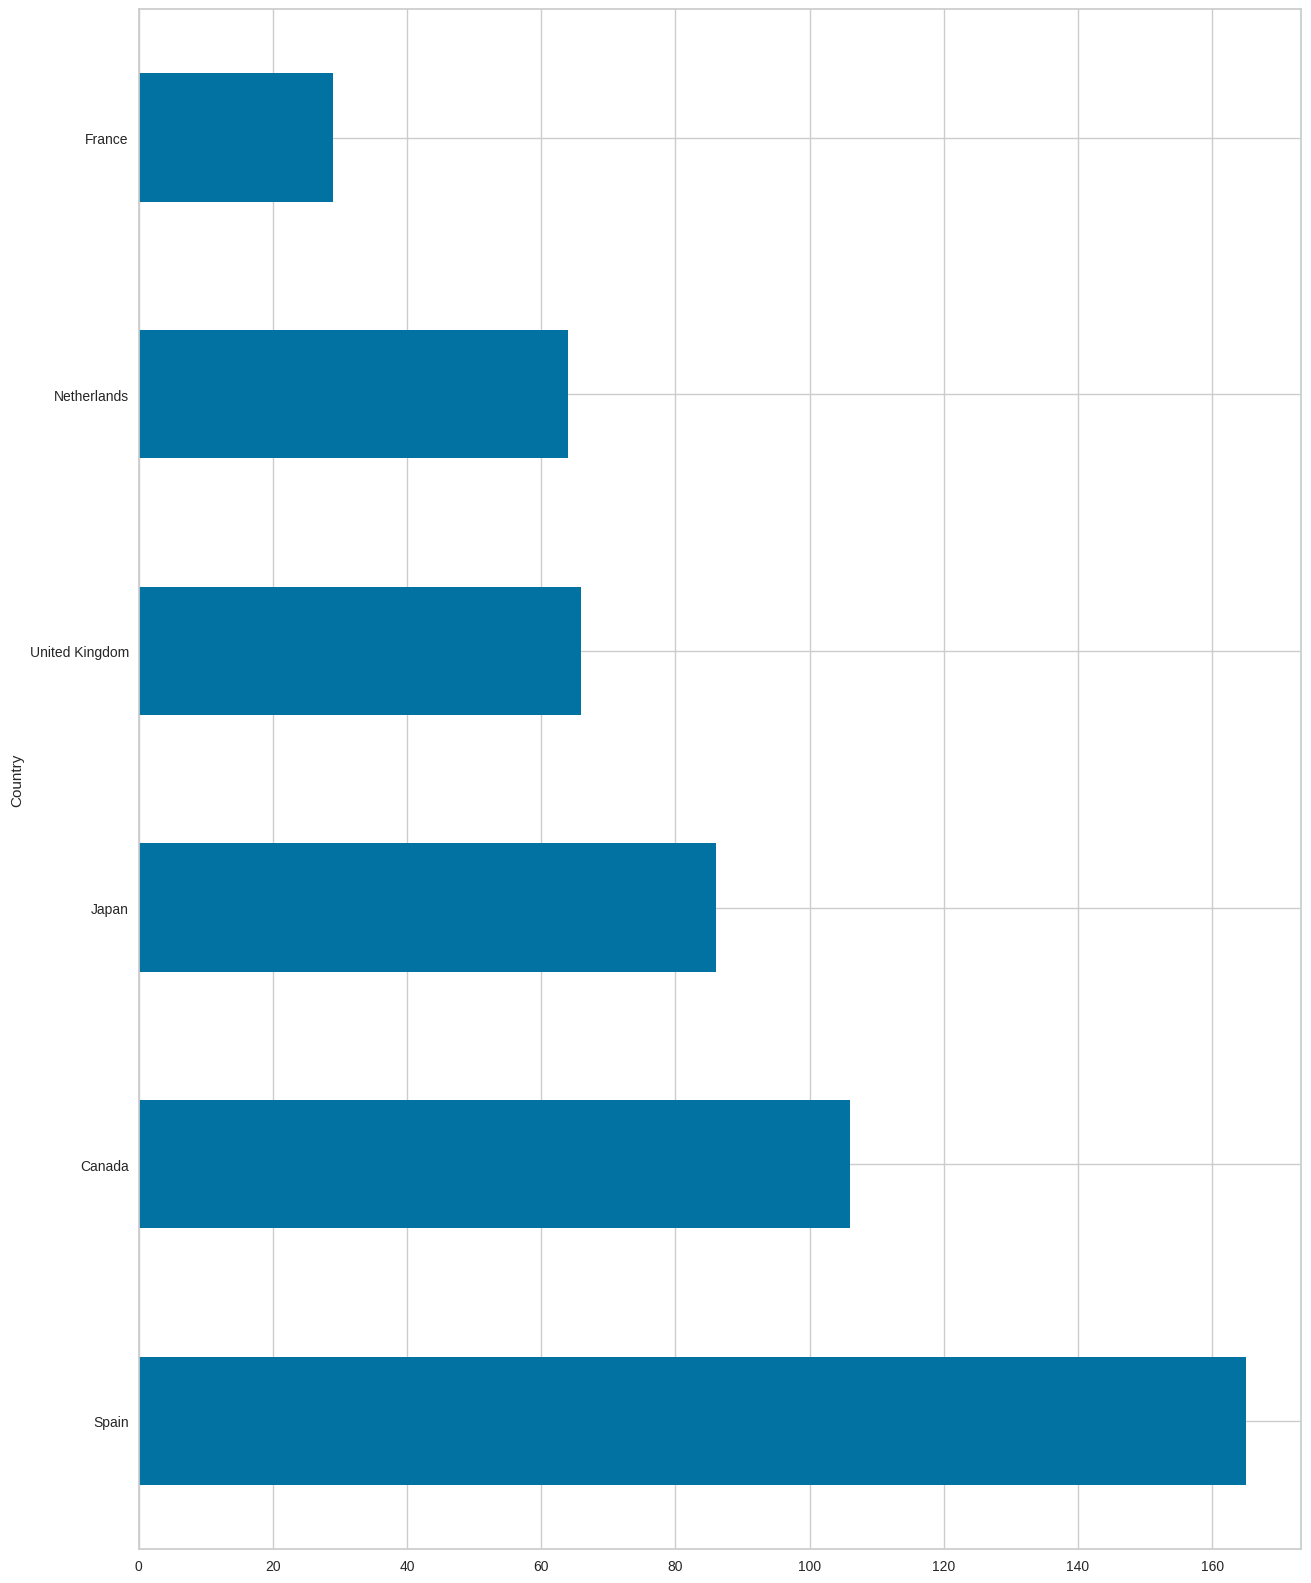

In [ ]:
plt.figure(figsize=(15,20))
new1_df.groupby('Country').Last_transection.mean().sort_values(ascending=False).plot.barh()
plt.show()

<ipython-input-78-c785ff5476d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)


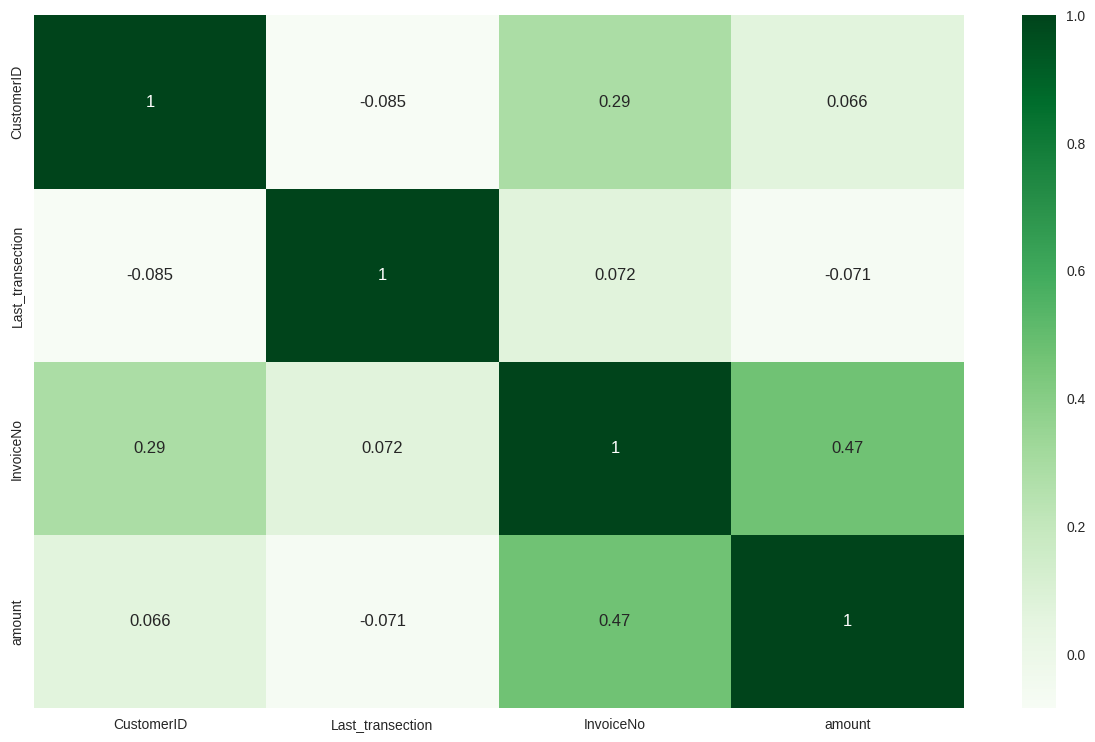

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)
plt.show()

<Figure size 1500x800 with 0 Axes>

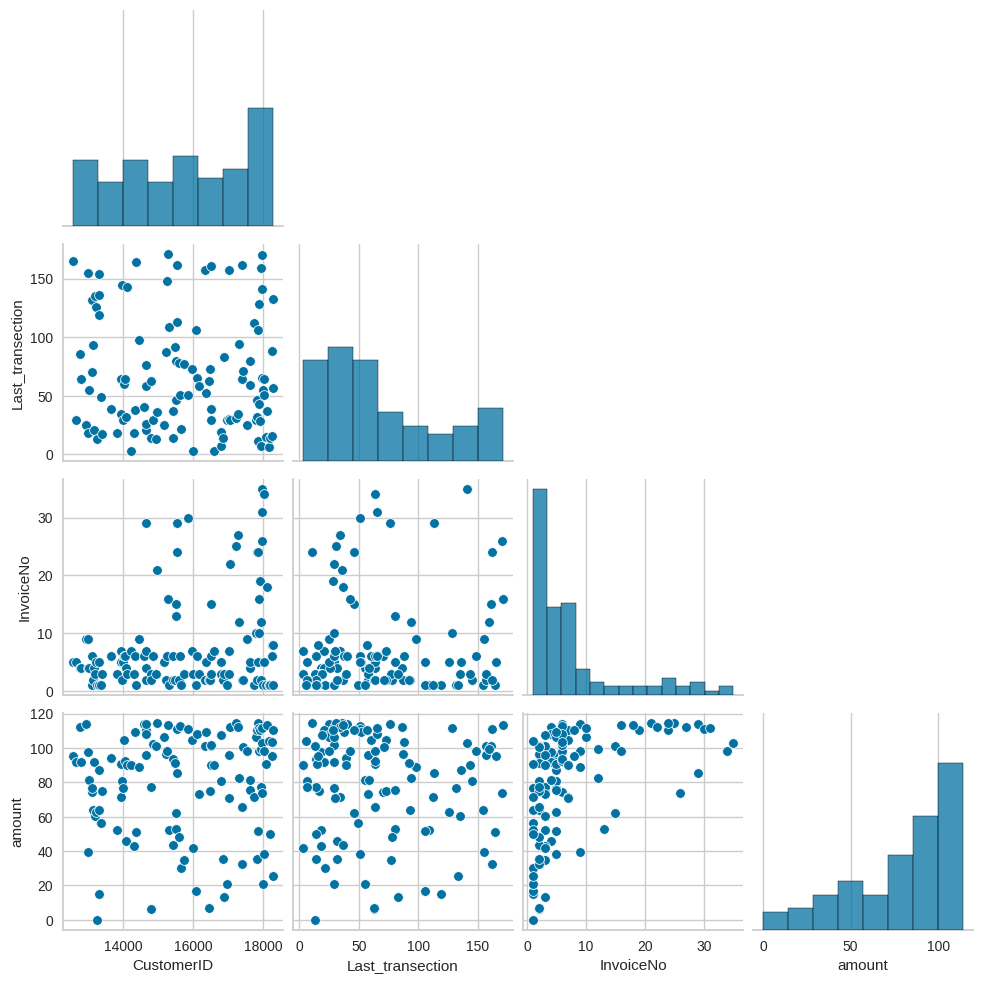

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(new1_df, corner=True)
plt.show()


In [ ]:
#Scaling the numeric data
from sklearn.preprocessing import MinMaxScaler
new2_df = new1_df[['Last_transection','InvoiceNo','amount']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)

In [ ]:
df_k  = pd.DataFrame(scaled_df , columns =['Last_transaction','InvoiceNo','amount'])
df_k

,Last_transaction,InvoiceNo,amount
0,0.964286,0.117647,0.832241
1,0.154762,0.117647,0.801469
2,0.494048,0.088235,0.979806
3,0.363095,0.088235,0.802955
4,0.130952,0.235294,0.997814
...,...,...,...
112,0.065476,0.000000,0.435353
113,0.077381,0.205882,0.833464
114,0.505952,0.147059,0.903051
115,0.773810,0.000000,0.222922


# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

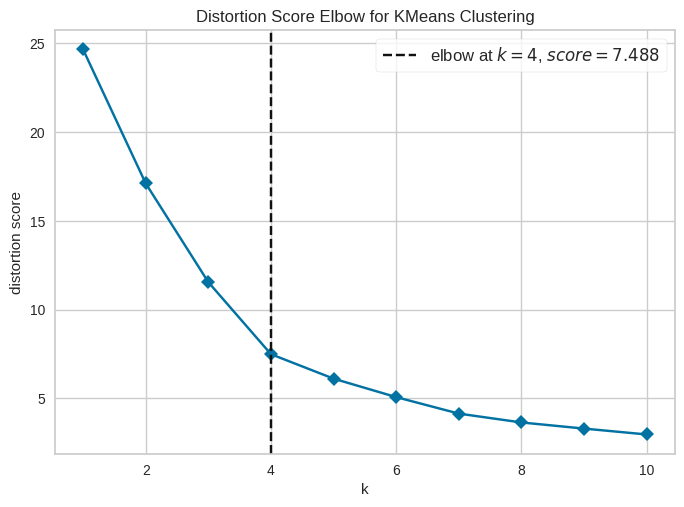

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters']= y_predicted
df_k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Last_transaction,InvoiceNo,amount,clusters
0,0.964286,0.117647,0.832241,0
1,0.154762,0.117647,0.801469,2
2,0.494048,0.088235,0.979806,2
3,0.363095,0.088235,0.802955,2
4,0.130952,0.235294,0.997814,2
...,...,...,...,...
112,0.065476,0.000000,0.435353,1
113,0.077381,0.205882,0.833464,2
114,0.505952,0.147059,0.903051,2
115,0.773810,0.000000,0.222922,1


In [ ]:
new2_df = pd.DataFrame(scaler.inverse_transform(df_k[['Last_transaction','InvoiceNo','amount']] ), columns =['Last_transaction','InvoiceNo','amount'])


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(new2_df, km.labels_, metric='euclidean')
print(score)

0.4342437510494391


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

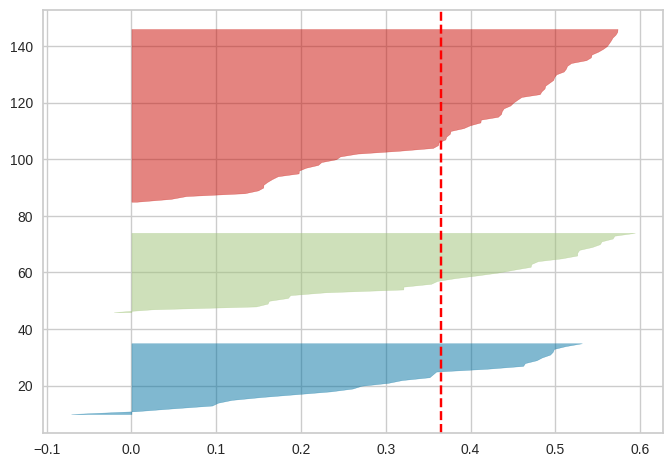

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_k.drop("clusters" ,axis =1 ))

In [ ]:
df_k3  = df_k.drop("clusters" ,axis =1 )


In [ ]:
km4 = KMeans(n_clusters=4)
y_predicted_4 = km4.fit_predict(df_k3)
score = silhouette_score(df_k3, km4.labels_, metric='euclidean')
print(score)

0.4272251911478334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Silhoutte score with four clusters
km3 = KMeans(n_clusters=3)
y_predicted_3 = km3.fit_predict(df_k3)
score = silhouette_score(df_k3, km3.labels_, metric='euclidean')
print(score)

0.36865367513604347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Silhoutte score with four clusters
km2 = KMeans(n_clusters=2)
y_predicted_2 = km2.fit_predict(df_k3)
score = silhouette_score(df_k3, km2.labels_, metric='euclidean')
print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3454264561685478


In [ ]:
new2_df

,Last_transaction,InvoiceNo,amount
0,165.0,5.0,95.20
1,29.0,5.0,91.68
2,86.0,4.0,112.08
3,64.0,4.0,91.85
4,25.0,9.0,114.14
...,...,...,...
112,14.0,1.0,49.80
113,16.0,8.0,95.34
114,88.0,6.0,103.30
115,133.0,1.0,25.50


In [ ]:
# Visualize the clusters with original data
from sklearn.cluster import KMeans
df1 = new2_df[new2_df.clusters == 0]
df2 = new2_df[new2_df.clusters==1]
df3 = new2_df[new2_df.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['amount'],color='green')
plt.scatter(df2.Last_transaction,df2['amount'],color='red')
plt.scatter(df3.Last_transaction,df3['amount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

AttributeError: ignored

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)